In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import toeplitz

### Визуализация матриц в качестве картинок:

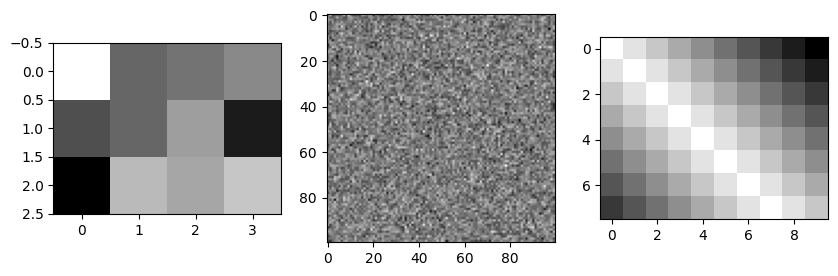

In [2]:
A = np.random.randn(3, 4)
B = np.random.randn(100, 100)
C = -toeplitz(np.arange(8), np.arange(10))

# showing matrices as images
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].imshow(A, cmap='gray')
axes[1].imshow(B, cmap='gray')
axes[2].imshow(C, cmap='gray')

### Индексация матриц по строкам и по колонкам:

In [3]:
A = np.reshape(np.arange(1, 10), (3,3))
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
# get the n-th row
print(A[1, :])

# to extract only one row you don't need the column indices
print(A[1])

[4 5 6]
[4 5 6]


In [5]:
# get the n-th column
print(A[:, 1])

[2 5 8]


In [6]:
# multiple rows
print(A[0:2,:])

[[1 2 3]
 [4 5 6]]


In [7]:
# multiple columns
print(A[:,1:])

[[2 3]
 [5 6]
 [8 9]]


In [8]:
# the full matrix
A = np.arange(60).reshape(6,10)

# a block of it
sub = A[1:4:1,0:5:1]


# print them out
print('Original matrix:\n')
print(A)

print('\n\nSubmatrix:\n')
print(sub)

Original matrix:

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


Submatrix:

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


### Создание специальных матриц

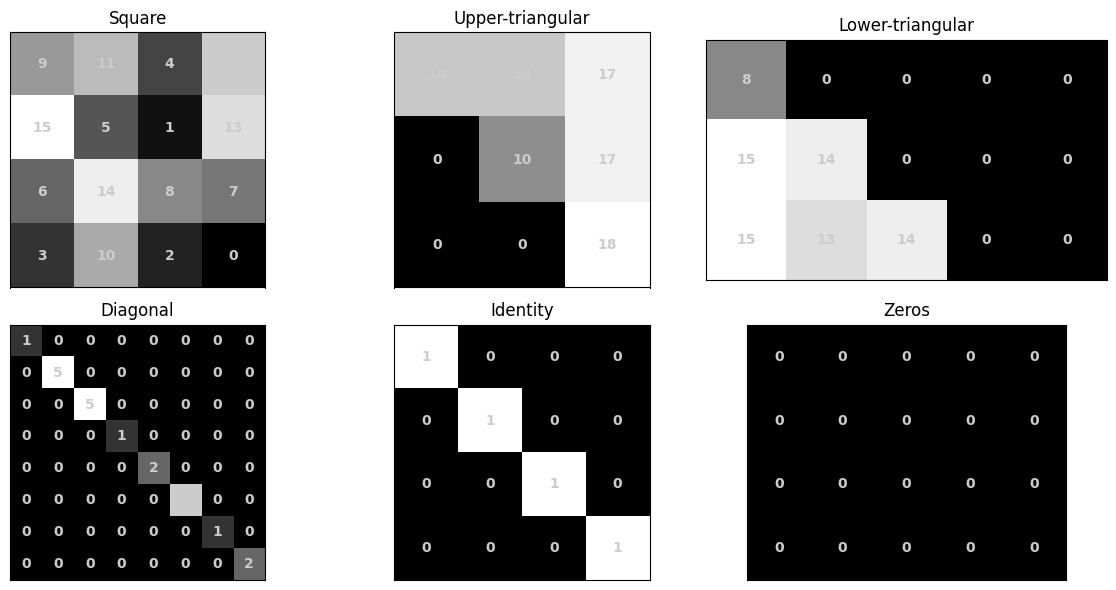

In [9]:
# square
M1 = np.random.permutation(16).reshape(4,4)

# upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3)))

# lower-triangular rectangular
M3 = np.tril(np.random.randint(8,16,(3,5)))

# diagonal
M4 = np.diag( np.random.randint(0,6,size=8) )

# identity
M5 = np.eye(4,dtype=int)

# zeros
M6 = np.zeros((4,5),dtype=int)

matrices  = [ M1, M2, M3, M4, M5, M6 ]
matLabels = [ 'Square', 'Upper-triangular', 'Lower-triangular', 'Diagonal', 'Identity', 'Zeros'  ]


_,axs = plt.subplots(2,3,figsize=(12,6))
axs = axs.flatten()

for mi,M in enumerate(matrices):
  axs[mi].imshow(M,cmap='gray',origin='upper',
                 vmin=np.min(M),vmax=np.max(M))
  axs[mi].set(xticks=[],yticks=[])
  axs[mi].set_title(matLabels[mi])

  # text labels
  for (j,i),num in np.ndenumerate(M):
    axs[mi].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontweight='bold')

plt.tight_layout()
plt.show()

### Сложение / Вычитание матриц:

In [10]:
A = np.array([  [2,3,4],
                [1,2,4] ])

B = np.array([  [ 0, 3,1],
                [-1,-4,2] ])

print(A+B)
print("\n")
print(A-B)

[[ 2  6  5]
 [ 0 -2  6]]


[[2 0 3]
 [2 6 2]]


### Смещение (shifting) матрицы

Так как мы не можем складывать матрицу со скалярным значением, нам доступна немного другая операция:

In [11]:
# Not shifting; broadcasting scalar addition
print(3 + np.eye(2))

[[4. 3.]
 [3. 4.]]


In [12]:
# This is shifting:
# the matrix
A = np.array([ [4,5, 1],
               [0,1,11],
               [4,9, 7]  ])

# the scalar
s = 6

print('Original matrix:')
print(A), print(' ')

# as in the previous cell, this is broadcasting addition, not shifting
print('Broadcasting addition:')
print(A + s), print(' ')

# This is shifting
print('Shifting:')
print( A + s*np.eye(len(A)) )

Original matrix:
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
 
Broadcasting addition:
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
 
Shifting:
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


### Умножение матрицы на скаляр

In [13]:
print(A), print(' ')
print(s*A)

[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
 
[[24 30  6]
 [ 0  6 66]
 [24 54 42]]


### Поэлементное умножение (умножение Адамара)

In [14]:

# two random matrices
A = np.random.randn(3,4)
B = np.random.randn(3,4)

# this is Hadamard multiplication
A*B

# and so is this
np.multiply(A,B)

# this one is NOT Hadamard multiplication
# A@B

array([[-0.19151171, -1.57169844, -0.17050535,  0.77079915],
       [ 0.0480217 , -0.42592602,  0.00936342,  0.42226867],
       [ 0.17137797, -0.2868725 ,  0.0360882 , -0.51935845]])

## Транспонирование матрицы

In [15]:
np.array(
    [
        [1, 2, 3, 91],
        [3, 4, 12, 1],
        [5, 6, 9, 11]
    ]
).T

array([[ 1,  3,  5],
       [ 2,  4,  6],
       [ 3, 12,  9],
       [91,  1, 11]])

In [16]:
# склеивание
x = np.array( [ [1, 2, 3], [4, 5, 6] ] )
print(x.ravel())

[1 2 3 4 5 6]


In [17]:
# Второй способ
print(x.reshape( -1 ))

[1 2 3 4 5 6]


### Скалярное произведение векторов

\begin{equation*}
\LARGE
\vec{a} \dot{} \vec{b} = |\vec{a}| |\vec{b}| \cos(\vec{a}, \vec{b})
\end{equation*}

### Предположим что,
\begin{equation*}
\LARGE
\vec{a} = (a_1, a_2, a_3) \\
\LARGE
\vec{b} = (b_1, b_2, b_3)
\end{equation*}

### Тогда скалярное произведение векторов равно
\begin{equation*}
\LARGE
\vec{a} \dot{} \vec{b} = a_1 b_1 + a_2 b_2 + a_3 b_3
\end{equation*}

In [18]:
a = np.array([12, 11, 10])
b = np.array([22, 17, 16])
np.dot(a, b)

611

In [19]:
# Расчет при помощи list comprehensions
sum( [ pair[0] * pair[1] for pair in zip( a, b ) ] )

611

# Косинусное расстояние между векторами

\begin{equation*}
\LARGE
cos(\vec{a}, \vec{b}) = \frac{\vec{a} \dot{} \vec{b}}{|\vec{a}|  |\vec{b}|}
\end{equation*}

## При помощи пакета NumPy реализуйте формулу расчета косинусного расстояния:

In [20]:
def cosine(a, b):
    """
    Cosine distance between two vectors.
    :param a: first vector
    :param b: second vector
    :return: cosine distance
    """
    # длины векторов
    aLength = np.linalg.norm(a)
    bLength = np.linalg.norm(b)
    try:
        return np.dot( a, b ) / ( aLength * bLength )
    except ValueError:
        return None

In [21]:
cosine(a, b)

0.9969814793851973

In [22]:
# угол между векторами в радианах
np.arccos(cosine(a, b))

0.07771795694864637

In [23]:
# угол между векторами в градусах
np.arccos(cosine(a, b)) * 180 / np.pi

4.452910925536867

# Закрепляем вышесказанное

Имеется матрица покупок в интернет-магазине.
Столбец А - ID пользователя.
Остальные столбцы - количество покупок категорий товаров этим пользователем:

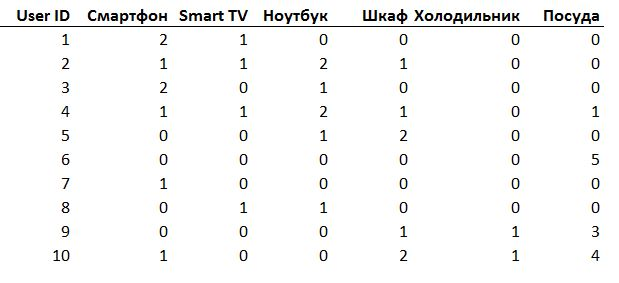

In [24]:
from IPython.display import Image
Image("output.jpeg")

In [25]:
# Матрица в виде numpy array
# Запишите матрицу в виде массива Numpy с типом данным np.int32
users_stats = np.array(
    [
        [2, 1, 0, 0, 0, 0],
        [1, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 0, 0],
        [1, 1, 2, 1, 0, 1],
        [0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 5],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 3],
        [1, 0, 0, 2, 1, 4]
    ],
    np.int32
)

На сайт заходит очередной посетитель, о покупках которого известно следующее:

In [26]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])

Посчитайте косинусное расстояние между этим пользователем и всеми пользователями из массива user_stats

In [27]:
for user_stat in users_stats:
    print(cosine(next_user_stats, user_stat))

0.19999999999999996
0.8451542547285165
0.3999999999999999
0.7905694150420948
0.3999999999999999
0.0
0.0
0.9486832980505138
0.0
0.0


## Умножение двух матриц

**Определение**

Пусть даны две матрицы a и b размером l x m и m x n соответственно. l - количество строк, n - количество столбцов.

\begin{equation*}
\LARGE
a =
\begin{bmatrix}
    a_{11} & a_{12} \dots a_{1m} \\
    a_{21} & a_{22} \dots a_{2m} \\
    \vdots & \vdots \dots \vdots \\
    a_{l1} & a_{l2} \dots a_{lm}
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\LARGE
b =
\begin{bmatrix}
    b_{11} & b_{12} \dots b_{1n} \\
    b_{21} & b_{22} \dots b_{2n} \\
    \vdots & \vdots \dots \vdots \\
    b_{m1} & b_{m2} \dots b_{mn}
\end{bmatrix}
\end{equation*}

Тогда произведением матриц a и b будет матрица c размерностью l x n:

\begin{equation*}
\LARGE
c =
\begin{bmatrix}
    c_{11} & c_{12} \dots c_{1n} \\
    c_{21} & c_{22} \dots c_{2n} \\
    \vdots & \vdots \dots \vdots \\
    c_{l1} & c_{l2} \dots c_{ln}
\end{bmatrix}
\end{equation*}


<br>

\begin{equation*}
\LARGE
c_{ij} = \sum_{k=1}^m a_{ik} b_{kj}
\end{equation*}

In [28]:
a = np.array(
    [[1, 2, 12, 0, 99],
    [3, 4, 11, 33, 11],
    [0, 22, 12, 91, 12]]
)

b = np.array([
    [5, 6, 23, 33, 11],
    [7, 8, 0, 0, 22],
    [23, 22, 31, 11, 19]
]).T

In [29]:
np.dot( a, b )

array([[1382, 2201, 2320],
       [1502,  295, 1070],
       [3543,  440, 2085]])

In [30]:
a@b

array([[1382, 2201, 2320],
       [1502,  295, 1070],
       [3543,  440, 2085]])

# В numpy есть специальный тип matrix, который отличается от ndarray

In [31]:
aMatrix = np.matrix( [ [1, 2], [3, 4] ] )
bMatrix = np.matrix( [ [5, 6], [7, 8] ] )

In [32]:
aMatrix * bMatrix

matrix([[19, 22],
        [43, 50]])

In [33]:
type( aMatrix ), type( aMatrix )

(numpy.matrix, numpy.matrix)

In [34]:
aMatrix * bMatrix.T

matrix([[17, 23],
        [39, 53]])

In [35]:
np.mat( aMatrix ) * np.mat( bMatrix )

matrix([[19, 22],
        [43, 50]])

# Линейные уравнения

Дана система линейных уравнений

\begin{equation*}
\LARGE
x + 3*y = 9 \\
\LARGE
2*x - 4*y = 8
\end{equation*}

In [36]:
# коэффициенты при переменных в левой части уравнения
a = np.array( [ [1, 3], [2, -4] ] )

In [37]:
# значения в правой части уравнения
b = np.array( [9, 8] )

In [38]:
# решение
answer = np.linalg.solve(a, b)

In [39]:
answer

array([6., 1.])

In [40]:
# проверка верности
np.allclose(np.dot(a, answer), b)

True

In [41]:
answer

array([6., 1.])

# Определитель матрицы

In [42]:
a = np.array(
    [
        [1, 2],
        [3, 4]
    ]
)

In [43]:
np.linalg.det( a )

-2.0000000000000004

In [44]:
# как получить единичную матрицу
np.eye(5, dtype = int )

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

# Сингулярное разложение

M - матрица m x n

$\sigma$ является сингулярным числом матрицы M, если существуют два вектора единичной длины u и v такие, что

\begin{equation*}
\LARGE
Mv = \sigma u \\
\LARGE
и \ M* u = \sigma v
\end{equation*}

Сингулярное разложение:

\begin{equation*}
\LARGE
M = U \sigma V^*
\end{equation*}

In [45]:
A = np.array([[0,1,1],[2,1,0],[3,4,5]])
u, V = np.linalg.eig(A)
print(u)

[ 5.85410197 -0.85410197  1.        ]


In [46]:
print(V)

[[ 1.80228488e-01  6.72063326e-01  6.22075198e-17]
 [ 7.42582208e-02 -7.24947536e-01 -7.07106781e-01]
 [ 9.80817725e-01  1.50936928e-01  7.07106781e-01]]


In [47]:
def svdsolver(A,b):
    U, s, V = np.linalg.svd(A)
    if np.prod(s) == 0:
       print("Matrix is singular")
    else:
       return np.dot(np.dot((V.T).dot(np.diag(s**(-1))), U.T),b)

In [48]:
A = np.array([[1,1],[1,2]])
b = np.array([3,1])
print(np.linalg.solve(A,b))
print(svdsolver(A,b))

[ 5. -2.]
[ 5. -2.]


### **Упражнение**

Создайте матрицу с рангом r (выберите сами). Для того, чтобы создать матрицу MxN с рангом r вам необходимо умножить случайную матрицу Mxr и rxN. Реализуйте данный механизм при помощи известных вам библиотек и убедитесь что ранг матрицы действительно равен r. Что произойдет если вы понизите ранг так что $r < min{M,N}$?

In [49]:
M = 5
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r,N)

print(A.shape)
print(np.linalg.matrix_rank(A))

(5, 8)
3


### **Упражнение**

Согласно свойствам обратной матрицы $(A^{-1})^{-1} = A$ Это аналогично операции 1/(1/а) = а. С помощью известных вам инструментов докажите этот факт при помощи случайных матриц.

In [50]:
n = 5

# the matrix
A = np.random.randn(n,n)

# its inverse, and its inverse's inverse
Ai  = np.linalg.inv(A)
Aii = np.linalg.inv(Ai)

# equal the original matrix within tolerance
np.round( A-Aii ,10)

array([[ 0.,  0.,  0., -0.,  0.],
       [-0., -0., -0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.],
       [ 0., -0.,  0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.]])